In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
    header=None,
).to_numpy()

A = data[:, :4].T.astype(np.float64)
labels = data[:, 4]
groups = ("Iris-setosa", "Iris-versicolor", "Iris-virginica")

# rows of A are features:
#   - sepal length
#   - sepal width
#   - petal length
#   - petal width

1 - How many samples are there in the dataset? How many samples belong to each class?


In [24]:
A.shape

(4, 150)

There are 150 samples in the dataset.


In [25]:
setosa = A[:, labels == "Iris-setosa"]
versicolor = A[:, labels == "Iris-versicolor"]
virginica = A[:, labels == "Iris-virginica"]

setosa.shape, versicolor.shape, virginica.shape

((4, 50), (4, 50), (4, 50))

In [26]:
n_setosa = np.count_nonzero(labels == "Iris-setosa")
n_versicolor = np.count_nonzero(labels == "Iris-versicolor")
n_virginica = np.count_nonzero(labels == "Iris-virginica")

n_setosa, n_versicolor, n_virginica

(50, 50, 50)

There are 50 samples in each class.


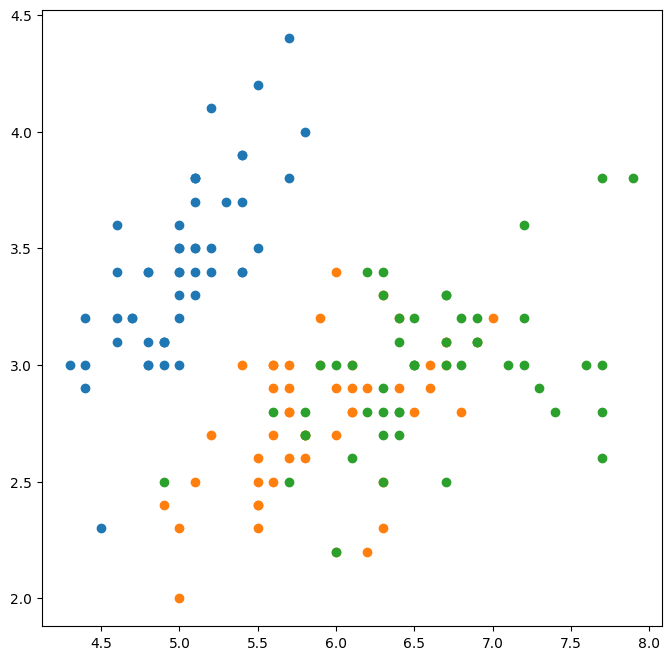

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax.scatter(A[0, labels == "Iris-setosa"], A[1, labels == "Iris-setosa"])
ax.scatter(A[0, labels == "Iris-versicolor"], A[1, labels == "Iris-versicolor"])
ax.scatter(A[0, labels == "Iris-virginica"], A[1, labels == "Iris-virginica"])

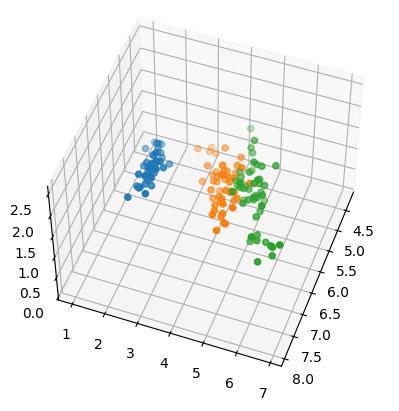

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    A[0, labels == "Iris-setosa"],
    A[2, labels == "Iris-setosa"],
    A[3, labels == "Iris-setosa"],
)
ax.scatter(
    A[0, labels == "Iris-versicolor"],
    A[2, labels == "Iris-versicolor"],
    A[3, labels == "Iris-versicolor"],
)
ax.scatter(
    A[0, labels == "Iris-virginica"],
    A[2, labels == "Iris-virginica"],
    A[3, labels == "Iris-virginica"],
)

ax.view_init(50, 20)

2 - Perform PCA on the dataset by using SVD decomposition.

Plot the trend of:

- singualr values $\sigma_k$;
- cumulate fraction of the singular values;
- fraction of explained variance.


In [29]:
# The matrix needs to be normalized before applying the SVD
A_mean = np.mean(A, axis=1)
A_bar = A - A_mean[:, np.newaxis]

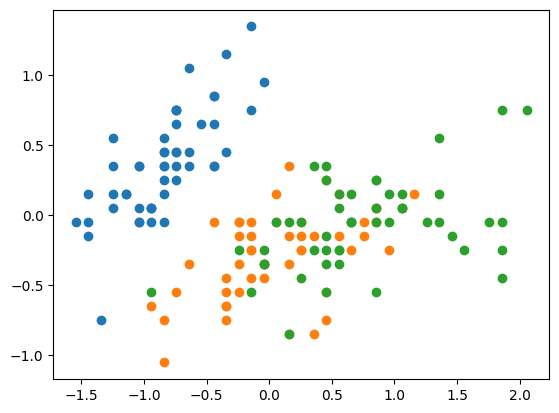

In [35]:
plt.scatter(A_bar[0, labels == "Iris-setosa"], A_bar[1, labels == "Iris-setosa"])
plt.scatter(
    A_bar[0, labels == "Iris-versicolor"], A_bar[1, labels == "Iris-versicolor"]
)
plt.scatter(A_bar[0, labels == "Iris-virginica"], A_bar[1, labels == "Iris-virginica"])

In [31]:
U, s, VT = np.linalg.svd(A_bar, full_matrices=False)
print(s)

[25.08986398  6.00785254  3.42053538  1.87850234]


Text(0.5, 1.0, 'Fraction of explained variance')

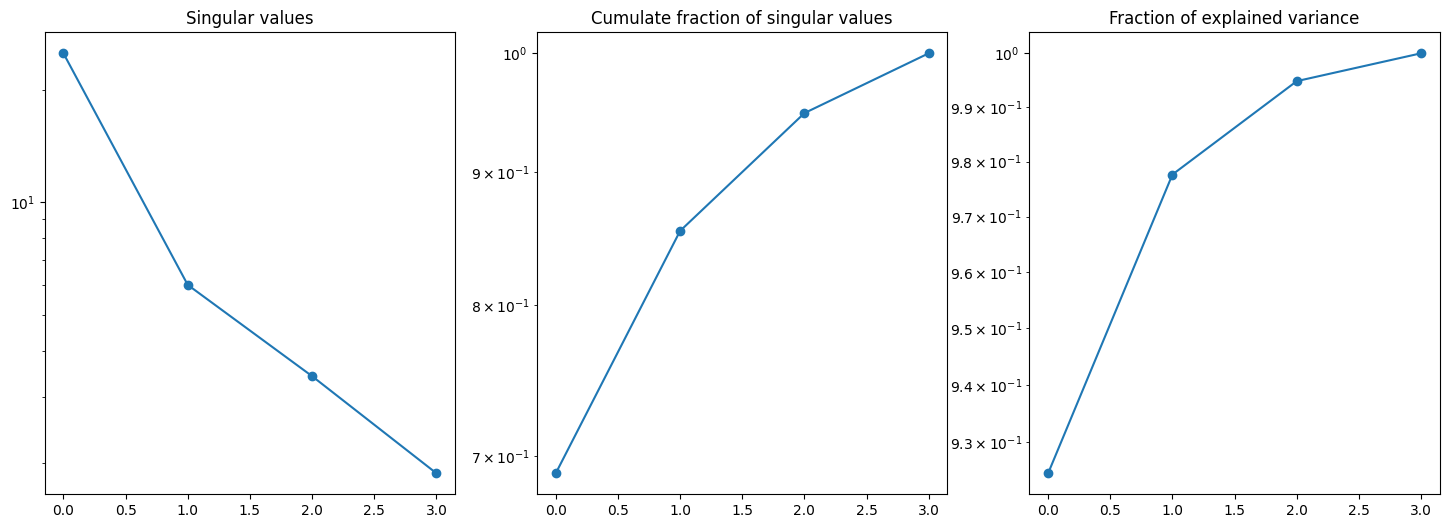

In [32]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
axs = axs.flatten()
axs[0].semilogy(s, "o-")
axs[0].set_title("Singular values")
axs[1].semilogy(np.cumsum(s) / np.sum(s), "o-")
axs[1].set_title("Cumulate fraction of singular values")
axs[2].semilogy(np.cumsum(s**2) / np.sum(s**2), "o-")
axs[2].set_title("Fraction of explained variance")

3 - Compute a matrix containing the principal components associated with the dataset.


In [33]:
PHI = U.T @ A_bar
PHI.shape

(4, 150)

4 - Generate a scatter plot of the first two principal components of the dataset, grouped by label.


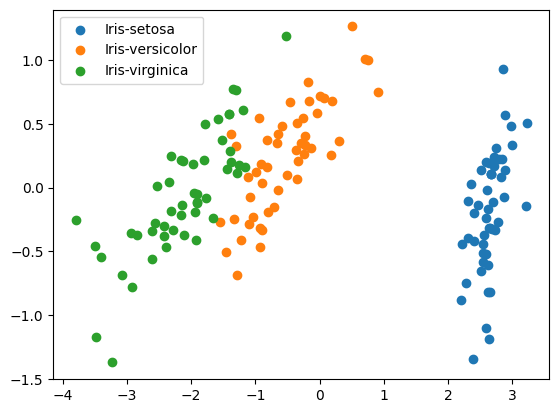

In [34]:
plt.scatter(
    PHI[0, labels == "Iris-setosa"],
    PHI[1, labels == "Iris-setosa"],
    label="Iris-setosa",
)
plt.scatter(
    PHI[0, labels == "Iris-versicolor"],
    PHI[1, labels == "Iris-versicolor"],
    label="Iris-versicolor",
)
plt.scatter(
    PHI[0, labels == "Iris-virginica"],
    PHI[1, labels == "Iris-virginica"],
    label="Iris-virginica",
)
plt.legend()

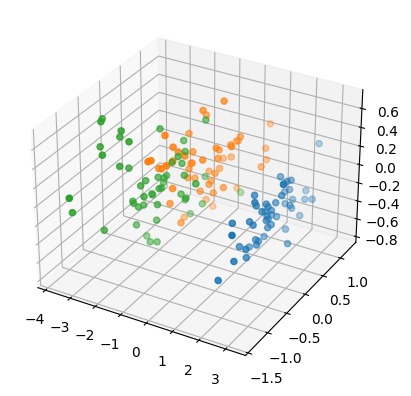

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(
    PHI[0, labels == "Iris-setosa"],
    PHI[1, labels == "Iris-setosa"],
    PHI[2, labels == "Iris-setosa"],
)
ax.scatter(
    PHI[0, labels == "Iris-versicolor"],
    PHI[1, labels == "Iris-versicolor"],
    PHI[2, labels == "Iris-versicolor"],
)
ax.scatter(
    PHI[0, labels == "Iris-virginica"],
    PHI[1, labels == "Iris-virginica"],
    PHI[2, labels == "Iris-virginica"],
)

# ax.view_init(25, 80)

5 - Comment on the results of point 4, in light of the results of point 2.


From point 2 we can see that the first two singular values can explain the 98% of the variance of the whole dataset.

This means that the first two columns of matrix U are the eigenvectors associated with these two singular values, and projecting our dataset on these gives the directions along with variance is maximized.

We also know that along these directions, features are ancorrelated, since the eigenvectors are orthogonal.

As we can see from the three groups denoted by the three colors green, orange and blue, by using the first two principal components we can easily classify the samples.
